# Explanatory - US Flights in 2008

### By Victoire Renaudin

## Introduction

In this project, I have analyzed some data comes from RITA. I have downloaded the data for 2008 to analyze the situation of this year. 

This dataset concerns airlines data with causes of delays and cancellations by flight number. I have compared air carriers during 2008 thought some main causes. 

In [1]:
# Importation of usefull librairies

import pandas as pd 
import numpy as np 
import os 
import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Importation of the dataset 
df_2008 = pd.read_csv('2008.csv')

## 2008 Overview

In [4]:
# How many rows is there in the dataset? 
df_2008.shape

(7009728, 29)

In [5]:
df_2008.sample()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2875622,2008,5,13,2,1721.0,1710,2212.0,2155,AA,498,...,9.0,22.0,0,NaN,0,11.0,0.0,6.0,0.0,0.0


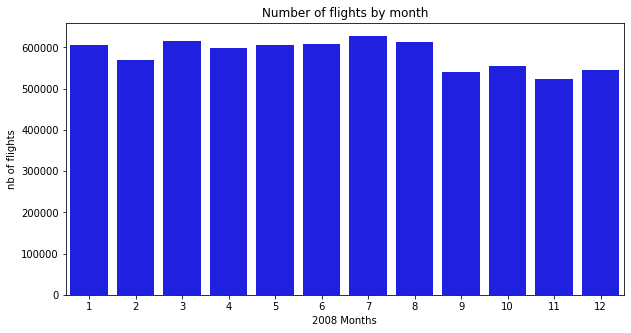

In [6]:
plt.figure(figsize=(10,5))


ax = sns.countplot(data = df_2008, 
                  x = 'Month',
                  color = 'blue')

plt.xlabel('2008 Months')
plt.ylabel('nb of flights')
plt.title('Number of flights by month')

plt.show()

Around 7 million flights are registered in this dataset for 2008. This corresponds to 580 000 flights per month. 
From September to December, there is a little bit less flights than other months. July and August have especially a high number of flights because of school holidays. 

In [7]:
df_carrier = df_2008['UniqueCarrier'].drop_duplicates().reset_index()

In [8]:
Carrier_list = [] 
   
for index, rows in df_carrier.iterrows(): 
    my_list = rows.UniqueCarrier
    Carrier_list.append(my_list)

### Overview 
On the total air fleet represents in this dataset, there are 20 carriers differents. Six of them represent more than 50% of the number of flights : WN, AA, OO, MQ, US and DL. 

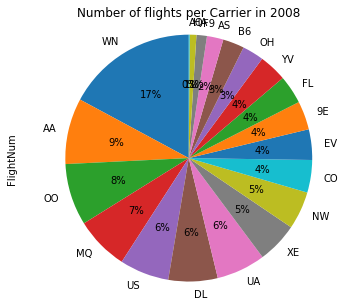

In [9]:
df_2008.groupby('UniqueCarrier')['FlightNum'].count().sort_values(ascending = False).plot(kind='pie',
                                                                figsize=(6, 5),
                                                                autopct='%1.0f%%', 
                                                                startangle=90     
                                                                )
 
plt.title('Number of flights per Carrier in 2008')
plt.axis('equal')
 
plt.show()

In [10]:
df_2008['UniqueCarrier'].nunique()

20

## Distribution of flights duration

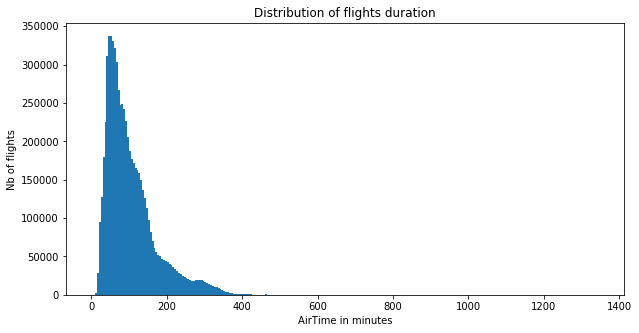

In [11]:
plt.figure(figsize = [10,5])
   
bin = np.arange(0, df_2008['AirTime'].max(), 5)
plt.hist(data = df_2008, 
         x = 'AirTime', 
         bins = bin)

plt.xlabel('AirTime in minutes')
plt.ylabel('Nb of flights')
plt.title('Distribution of flights duration')

plt.show()

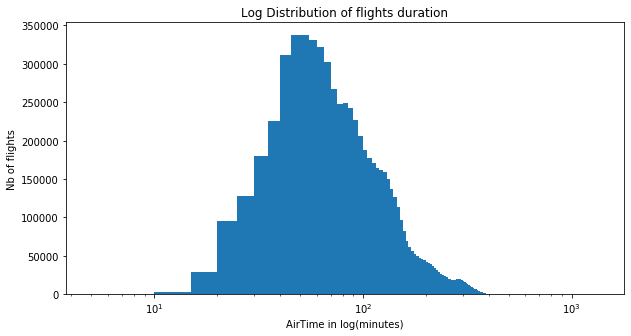

In [12]:
plt.figure(figsize = [10,5])
   
bin = np.arange(0, df_2008['AirTime'].max(), 5)
plt.hist(data = df_2008, 
         x = 'AirTime', 
         bins = bin)

plt.xscale('log')
plt.xlabel('AirTime in log(minutes)')
plt.ylabel('Nb of flights')
plt.title('Log Distribution of flights duration')

plt.show()

In [13]:
df_2008['AirTime'].mean()

104.0185891263188

The distribution of flights duration is normal with an average flights duration of 104 minutes (ie. 1h 44min). 

## Arrival Delay

### Arrival Delay average

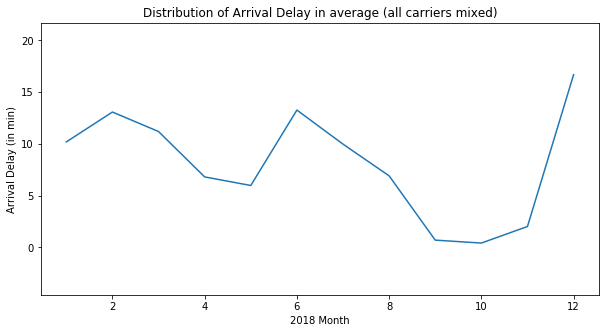

In [16]:
df_delay = df_2008.groupby(['Month'])['ArrDelay'].mean().reset_index( name = 'Avg_ArrDelay') 

min_ArrDelay = df_delay['Avg_ArrDelay'].min()
max_ArrDelay = df_delay['Avg_ArrDelay'].max()

plt.figure(figsize = [10, 5])
plt.plot(df_delay['Month'], 
             df_delay['Avg_ArrDelay'])

plt.title('Distribution of Arrival Delay in average (all carriers mixed)')
plt.ylabel('Arrival Delay (in min)')
plt.xlabel('2018 Month')
plt.ylim(ymin = min_ArrDelay - 5,
         ymax = max_ArrDelay + 5)
plt.show()

In [17]:
df_delay['Avg_ArrDelay'].mean()

8.100592924240631

The average arrival delay for 2018 is 8 minutes all in all. 
The average arrival delay is higher in December (with about 17 minutes of delay) whereas it it quite low in September, October and November. 

### Arrival Delay by Carrier

In [18]:
df_carrier_arrdelay = df_2008.groupby(['UniqueCarrier', 'Month'])['ArrDelay'].mean().reset_index( name = 'Avg_ArrDelay')

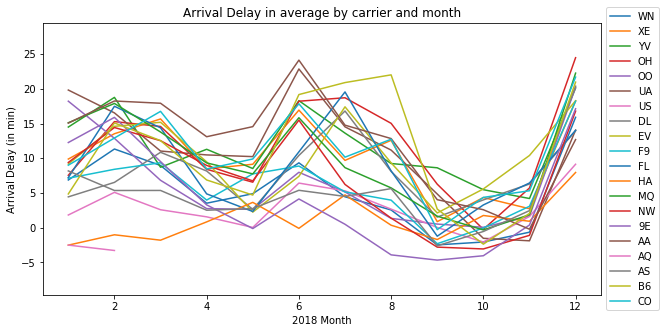

In [19]:
max_ArrDelay = df_carrier_arrdelay['Avg_ArrDelay'].max()
min_ArrDelay = df_carrier_arrdelay['Avg_ArrDelay'].min()

plt.figure(figsize = [10, 5])
for i in Carrier_list: 
    plt.plot(df_carrier_arrdelay[df_carrier_arrdelay['UniqueCarrier'] == i]['Month'], 
             df_carrier_arrdelay[df_carrier_arrdelay['UniqueCarrier'] == i]['Avg_ArrDelay'],
            label = i)

plt.title('Arrival Delay in average by carrier and month')
plt.ylabel('Arrival Delay (in min)')
plt.xlabel('2018 Month')
plt.ylim(ymin = min_ArrDelay - 5,
         ymax = max_ArrDelay + 5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Regarding the arrival delay per carrier and per month is very interesting. 
Per month, the average arrival delay by carrier is between -5 minutes (ie. in advance of 5minutes) and 25 minutes which is quite different. There is a different comportement by air carrier but also a seasonality. 
As seen before, the arrival delay is very low in September, October and November.

### On-time flights / Total number flights

A flight could be considered delayed when it arrived 15 or more minutes than the schedule.

In [20]:
df_2008['on_time'] = 0
df_2008['on_time'][df_2008['ArrDelay'] <= 15] = 1 

/Users/victoire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
df_2008.groupby(['on_time']).size().reset_index(name = 'nb_flights')

,on_time,nb_flights
0,0,1620890
1,1,5388838


In [21]:
df_carrier_ontime = df_2008.groupby(['UniqueCarrier', 'on_time', 'Month']).size().reset_index(name = 'nb_flights')

In [22]:
df_carrier_ontime = 100 * df_carrier_ontime[df_carrier_ontime['on_time'] == 1].groupby(['UniqueCarrier', 'Month'])['nb_flights'].sum()/df_carrier_ontime.groupby(['UniqueCarrier', 'Month'])['nb_flights'].sum()

In [23]:
df_carrier_ontime = df_carrier_ontime.reset_index( name = 'percent_on_time')

## On-time arrival performance by Carrier and month
Depending of the month, between 60% to 95% of the flights seem to be on time.
I have observed before that the average delay is quite high in December, and it corresponds to a percentage of on-time flights quite low for this month. 

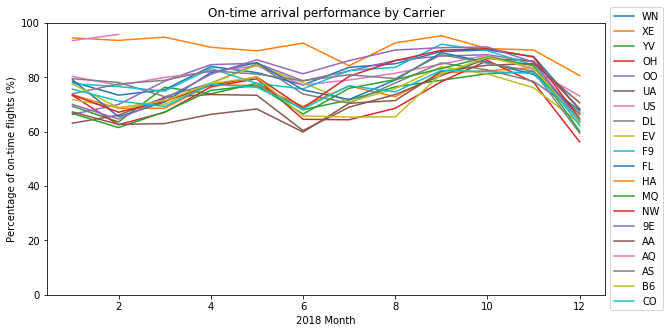

In [24]:
plt.figure(figsize = [10, 5])
for i in Carrier_list: 
    plt.plot(df_carrier_ontime[df_carrier_ontime['UniqueCarrier'] == i]['Month'], 
             df_carrier_ontime[df_carrier_ontime['UniqueCarrier'] == i]['percent_on_time'],
            label = i)

plt.title('On-time arrival performance by Carrier')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('2018 Month')
plt.ylim(ymin = 0,
         ymax = 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
df_ontime = df_2008.groupby(['UniqueCarrier', 'on_time']).size().reset_index( name = 'nb_flights')

In [26]:
df_ontime = 100 * df_ontime[df_ontime['on_time'] == 1].groupby(['UniqueCarrier'])['nb_flights'].sum()/df_ontime.groupby(['UniqueCarrier'])['nb_flights'].sum()

In [27]:
df_ontime = df_ontime.reset_index(name = 'percent_on_time')

In [28]:
df_ontime = df_ontime.sort_values(by = ['percent_on_time'], ascending = False)

## On-time arrival performance by Carrier
Regarding only by carrier, the percent of on-time flghts is more than 70% for every carrier. 
The better carrier on this criteria is AQ following by HA.

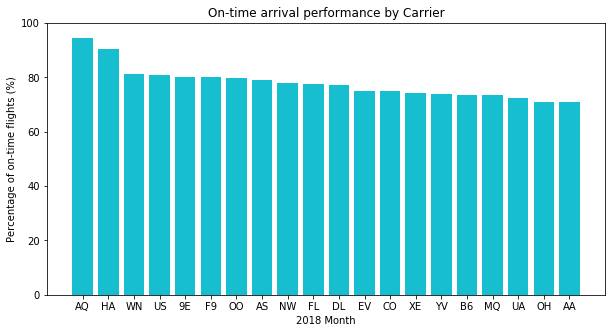

In [29]:
plt.figure(figsize = [10, 5])
for i in Carrier_list: 
    plt.bar(df_ontime['UniqueCarrier'], 
            df_ontime['percent_on_time'])

plt.title('On-time arrival performance by Carrier')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('2018 Month')
plt.ylim(ymin = 0,
         ymax = 100)
plt.show()

### Are delays more frequent in some origin airport ? 

In [105]:
df_ontime_origin = df_2008.groupby(['Origin', 'on_time']).size().reset_index( name = 'nb_flights')

In [106]:
df_ontime_origin = 100 * df_ontime_origin[df_ontime_origin['on_time'] == 1].groupby(['Origin'])['nb_flights'].sum()/df_ontime_origin.groupby(['Origin'])['nb_flights'].sum()

In [107]:
df_ontime_origin = df_ontime_origin.reset_index(name = 'percent_on_time')

In [108]:
df_ontime_origin = df_ontime_origin.sort_values(by = ['percent_on_time'], ascending = False)
df_ontime_origin = df_ontime_origin.head(20)

## On-time arrival performance by origin airport
More than 98% of flights in INL and WYS airports are on time. 

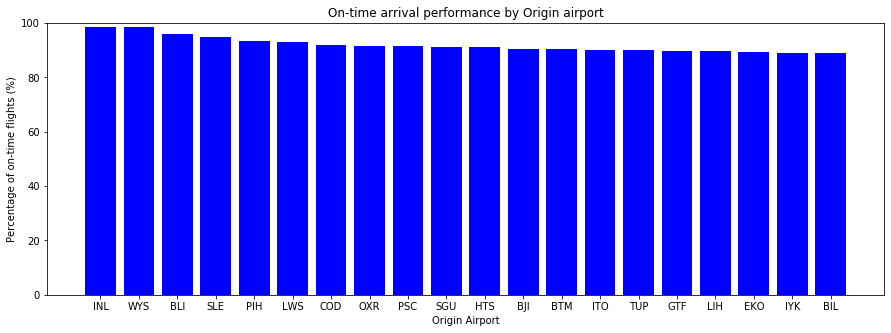

In [110]:
plt.figure(figsize = [15, 5])
for i in Carrier_list: 
    plt.bar(df_ontime_origin['Origin'], 
            df_ontime_origin['percent_on_time'],
           color = 'blue')

plt.title('On-time arrival performance by Origin airport')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('Origin Airport')
plt.ylim(ymin = 0,
         ymax = 100)
plt.show()

### Are delays more frequent in some destination airport ? 

In [96]:
df_ontime_dest = df_2008.groupby(['Dest', 'on_time']).size().reset_index( name = 'nb_flights')

In [98]:
df_ontime_dest = 100 * df_ontime_dest[df_ontime_dest['on_time'] == 1].groupby(['Dest'])['nb_flights'].sum()/df_ontime_dest.groupby(['Dest'])['nb_flights'].sum()

In [99]:
df_ontime_dest = df_ontime_dest.reset_index(name = 'percent_on_time')

In [100]:
df_ontime_dest = df_ontime_dest.sort_values(by = ['percent_on_time'], ascending = False)
df_ontime_dest = df_ontime_dest.head(20)

## On-time arrival performance by destination airport
Almost all flights in TUP airport are on time.
It is not the same situation in CPR or HLN where there is around 85% flights on-time. 

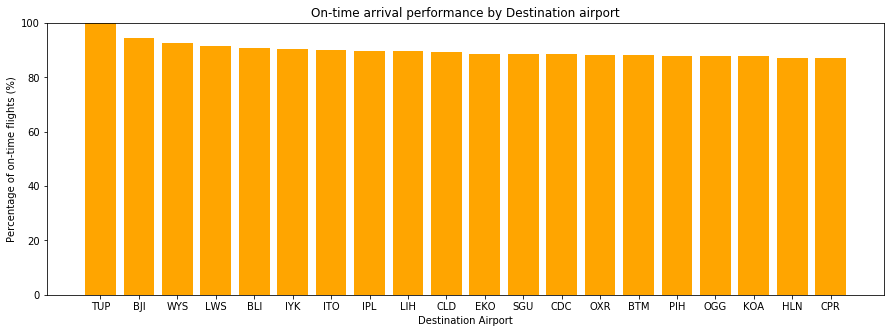

In [111]:
plt.figure(figsize = [15, 5])
for i in Carrier_list: 
    plt.bar(df_ontime_dest['Dest'], 
            df_ontime_dest['percent_on_time'],
           color = 'orange')

plt.title('On-time arrival performance by Destination airport')
plt.ylabel('Percentage of on-time flights (%)')
plt.xlabel('Destination Airport')
plt.ylim(ymin = 0,
         ymax = 100)
plt.show()

### Is there a correlation between arrival and departure delay ?

In [129]:
df_cor = df_2008[['ArrDelay', 'DepDelay']]

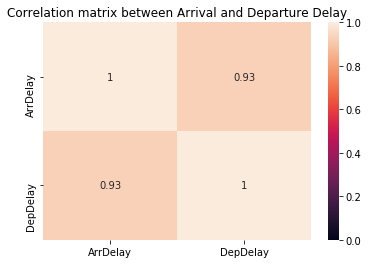

In [135]:
corr = df_cor.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            vmin=0, 
            vmax=1,
            annot=True)

plt.title('Correlation matrix between Arrival and Departure Delay')
plt.show()

There is a strong correlation between Departure and Arrival Delay as we can see in the correlation matrix above (with a coefficient of 0,93). 

## Correlation between Arrival and Departure Delay 
There is a high correlation between arrival and departure delay  : a departure on-time will conducted to an arrival on-time.

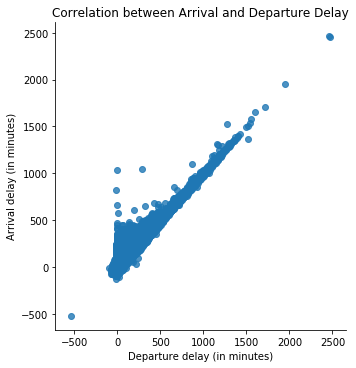

In [139]:
sns.lmplot(data=df_2008,
           x='DepDelay', 
           y='ArrDelay', 
           fit_reg=False)

plt.title('Correlation between Arrival and Departure Delay')
plt.xlabel('Departure delay (in minutes)')
plt.ylabel('Arrival delay (in minutes)')

plt.show()

## Reason of delay

## Reason of delay 
The main reason for delay is late aircraft, followed by NAS and then Carrier. 
Security seems to be a very poor reason of delay.

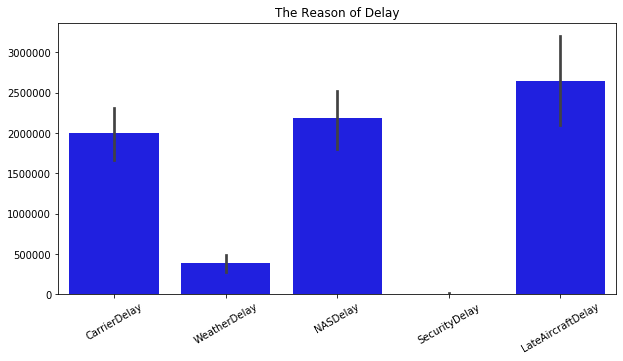

In [30]:
plt.figure(figsize=(10,5))

sns.barplot(data= df_2008.groupby('Month')[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum(),
           color = 'blue')

plt.title('The Reason of Delay')
plt.xticks(rotation='30')

plt.show()

## Reason of cancellation

In [145]:
df_2008['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

In [54]:
df_cancel = df_2008['CancellationCode'].groupby(df_2008['Year']).value_counts().groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True).unstack(fill_value=0)
df_cancel_month = df_2008['CancellationCode'].groupby(df_2008['Month']).value_counts().groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True).unstack(fill_value=0)

In [55]:
df_cancel.rename(columns = {"A": "Carrier", 'B' : 'Weather', 'C': 'NAS', 'D': 'Security'}, inplace = True)
df_cancel_month.rename(columns = {"A": "Carrier", 'B' : 'Weather', 'C': 'NAS', 'D': 'Security'}, inplace = True)

## Cancellation reason
1/3 of all flights are cancelled because of weather and another 1/3 is cancelled because of Carrier.

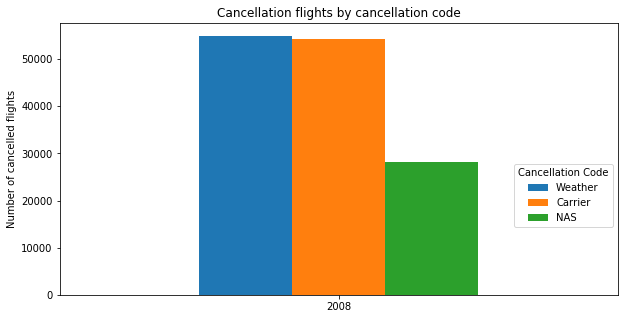

In [72]:
df_cancel.plot(kind = 'bar', 
                sort_columns= 'CancellationCode',  
                figsize=(10,5));
plt.legend(bbox_to_anchor=(1, 0.5), 
           title = 'Cancellation Code')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Number of cancelled flights')
plt.title('Cancellation flights by cancellation code');

plt.show()

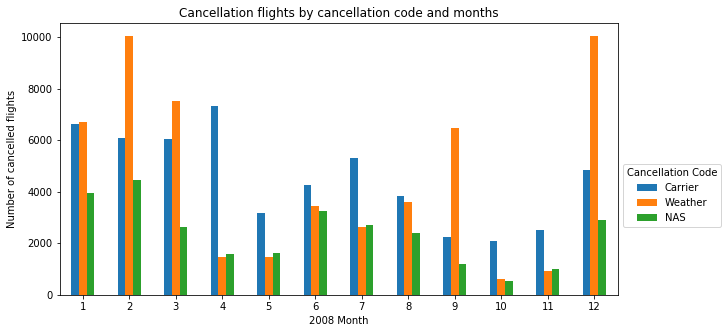

In [73]:
df_cancel_month.plot(kind = 'bar', 
                sort_columns= 'CancellationCode',  
                figsize=(10,5));
plt.legend(bbox_to_anchor=(1, 0.5), 
           title = 'Cancellation Code')
plt.xticks(rotation=0)
plt.xlabel('2008 Month')
plt.ylabel('Number of cancelled flights')
plt.title('Cancellation flights by cancellation code and months');

plt.show()

It seems to have a seasonality of cancellation reason. 
For example, the number of cancellation flights because of weather is very important in February and December (in winter). 

# Conclusion

In 2008, most than 7 million flights were planned. Almost 23% were delayed and 2% were cancelled. 
These 23% of delayed flights corresponds mainly to Late Aircraft Delay, NAS delay and Carrier Delay. 
Concerning the 2% of cancelled flights, there are mainly due to Weather and Carrier. 